## Aula 5 - Pandas

In [6]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

In [19]:
series_1 = Series(np.arange(3), index=["a", "b", "c"])
series_1

a    0
b    1
c    2
dtype: int32

In [20]:
series_1 = series_1.drop("a")
series_1

b    1
c    2
dtype: int32

In [23]:
data_frame = DataFrame(np.arange(9).reshape((3,3)),
                      index = ["Desktop", "Tablet", "Phone"],
                      columns = ["Brasil", "Chile", "Peru"])

In [21]:
data_frame

,Brasil,Chile,Peru
Desktop,0,1,2
Tablet,3,4,5
Phone,6,7,8


In [24]:
data_frame.drop("Peru", axis=1)

,Brasil,Chile
Desktop,0,1
Tablet,3,4
Phone,6,7


In [29]:
data_frame[data_frame["Chile"]>=7]

,Brasil,Chile,Peru
Phone,6,7,8


In [36]:
data_frame[(data_frame["Chile"]>=1) & (data_frame["Peru"]>3)] 

,Brasil,Chile,Peru
Tablet,3,4,5
Phone,6,7,8


In [39]:
series_2 = Series(np.random.randn(10))

In [41]:
series_2.sort_values()

3   -1.363392
6   -0.690552
8   -0.676516
9    0.111552
1    0.266169
2    0.335034
7    0.339447
4    0.479904
5    1.864112
0    2.200560
dtype: float64

In [43]:
series_2.rank()

0    10.0
1     5.0
2     6.0
3     1.0
4     8.0
5     9.0
6     2.0
7     7.0
8     3.0
9     4.0
dtype: float64

In [47]:
linhas = np.array([[1,2,3,np.nan],[5,np.nan,7,8],[9,10,11,12]])
data_frame_1 = DataFrame(linhas, index=['a', 'b', 'c'], columns = ["col1", "col2","col3", "col4"])
data_frame_1

,col1,col2,col3,col4
a,1.0,2.0,3.0,NaN
b,5.0,NaN,7.0,8.0
c,9.0,10.0,11.0,12.0


In [55]:
data_frame_1.idxmax()

col1    c
col2    c
col3    c
col4    c
dtype: object

## Desafio 1 
Utilize a base de dados relacionados ao estudo de diabetes do PIMAS na pasta data (github) e exiba os seguintes valores para o campo “glucose_conc” e “thickness”.  
• Valores nulos  
• Valores numéricos iguais a 0  
• Média  
• Máximo  
• Mínimo  

In [102]:
pima_data = pd.read_csv("pima-data.csv")

# Linhas com informações nulas
pima_data[pima_data.isnull().any(axis=1)]

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
2,8,183,NaN,0.0,0.0,23.3,0.672,32,0.0000,True
3,1,89,66.0,NaN,94.0,28.1,0.167,21,0.9062,False
8,2,197,70.0,NaN,543.0,30.5,0.158,53,1.7730,True
11,10,168,74.0,NaN,0.0,38.0,0.537,34,0.0000,True
15,7,100,0.0,0.0,NaN,30.0,0.484,32,0.0000,True


In [99]:
# Coluna glucose
pima_data[pima_data['glucose_conc'].isnull()]

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes


In [101]:
# Coluna thickness
pima_data[pima_data['thickness'].isnull()]

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
3,1,89,66.0,NaN,94.0,28.1,0.167,21,0.9062,False
8,2,197,70.0,NaN,543.0,30.5,0.158,53,1.7730,True
11,10,168,74.0,NaN,0.0,38.0,0.537,34,0.0000,True


In [106]:
pima_data[(pima_data['thickness'] == 0) | (pima_data['glucose_conc'] == 0)].head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
2,8,183,NaN,0.0,0.0,23.3,0.672,32,0.0,True
5,5,116,74.0,0.0,0.0,25.6,0.201,30,0.0,False
7,10,115,0.0,0.0,0.0,35.3,0.134,29,0.0,False
9,8,125,96.0,0.0,0.0,0.0,0.232,54,0.0,True
10,4,110,92.0,0.0,0.0,37.6,0.191,30,0.0,False
12,10,139,80.0,0.0,0.0,27.1,1.441,57,0.0,False
15,7,100,0.0,0.0,NaN,30.0,0.484,32,0.0,True
17,7,107,74.0,0.0,0.0,29.6,0.254,31,0.0,True
21,8,99,84.0,0.0,0.0,35.4,0.388,50,0.0,False
22,7,196,90.0,0.0,0.0,39.8,0.451,41,0.0,True


In [76]:
pima_data[['glucose_conc', 'thickness']].max()

glucose_conc    199.0
thickness        99.0
dtype: float64

In [79]:
pima_data[['glucose_conc', 'thickness']].min()

glucose_conc    0.0
thickness       0.0
dtype: float64

In [108]:
pima_data[['glucose_conc', 'thickness']].mean()

glucose_conc    120.894531
thickness        20.528105
dtype: float64

## Correlacoes

In [116]:
dados.head(10)

,TRADEDATE,SECID,OPEN,HIGH
0,2017-07-03,USD000UTSTOM,58.9800,59.4250
1,2017-07-04,USD000UTSTOM,59.3000,59.4575
2,2017-07-04,USD000UTSTOM,59.3600,59.3600
3,2017-07-05,USD000UTSTOM,59.3000,60.2600
4,2017-07-05,USD000UTSTOM,59.3400,60.1800
5,2017-07-06,USD000UTSTOM,60.1025,60.4350
6,2017-07-06,USD000UTSTOM,60.0700,60.3700
7,2017-07-07,USD000UTSTOM,60.4000,60.6250
8,2017-07-07,USD000UTSTOM,60.4522,60.5700
9,2017-07-10,USD000UTSTOM,60.3025,60.5375


In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
dados = pd.read_excel("moex_world_bank.xlsx")
dados.drop(['BOARDID', 'SHORTNAME','LOW', 'NUMTRADES', 'CLOSE','VOLRUR', 'WAPRICE'], axis=1,inplace=True)
correlacao = dados.corr()
correlacao

,OPEN,LOW,HIGH,CLOSE,NUMTRADES,VOLRUR,WAPRICE
OPEN,1.000000,0.889388,0.877961,0.733103,0.117619,0.096816,0.866821
LOW,0.889388,1.000000,0.875049,0.864398,0.139075,0.120851,0.960857
HIGH,0.877961,0.875049,1.000000,0.892065,0.172835,0.160883,0.983079
CLOSE,0.733103,0.864398,0.892065,1.000000,0.044780,0.035709,0.920525
NUMTRADES,0.117619,0.139075,0.172835,0.044780,1.000000,0.995096,0.618846
VOLRUR,0.096816,0.120851,0.160883,0.035709,0.995096,1.000000,0.527119
WAPRICE,0.866821,0.960857,0.983079,0.920525,0.618846,0.527119,1.000000


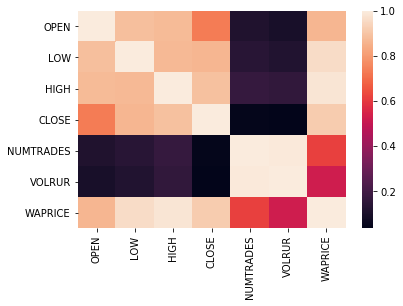

In [135]:
# Correlacao dos dados, mais claro é maior correlacao
sns.heatmap(correlacao)

## Desafio 2
Correlacione todas as variáveis existentes na base de dados do challenge 1 e sugira quais atributos devem ser removidos e por qual motivo.  
Exclua o atributo escolhido.  
Armazene o resultado em “pima-data-norm-2.Csv”.  

In [140]:
pima_cor = pima_data.corr()
pima_cor

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141854,-0.077766,-0.072753,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.153644,0.055708,0.330962,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141854,0.153644,1.000000,0.208087,0.086241,0.281662,0.041485,0.239504,0.207161,0.065621
thickness,-0.077766,0.055708,0.208087,1.000000,0.432856,0.395593,0.187048,-0.117621,1.000000,0.074865
insulin,-0.072753,0.330962,0.086241,0.432856,1.000000,0.197701,0.185162,-0.042272,0.436227,0.131984
bmi,0.017683,0.221071,0.281662,0.395593,0.197701,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041485,0.187048,0.185162,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239504,-0.117621,-0.042272,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207161,1.000000,0.436227,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065621,0.074865,0.131984,0.292695,0.173844,0.238356,0.074752,1.000000


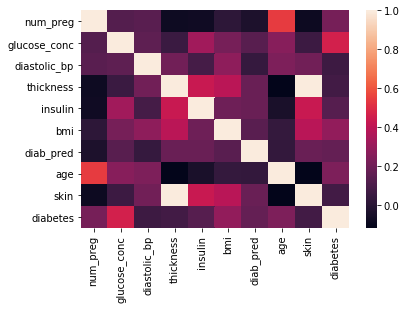

In [142]:
sns.heatmap(pima_cor)

In [149]:
pima_data.drop(['skin'], axis=1, inplace=True)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72.0,35.0,0.0,33.6,0.627,50,True
1,1,85,66.0,29.0,0.0,26.6,0.351,31,False
2,8,183,NaN,0.0,0.0,23.3,0.672,32,True
3,1,89,66.0,NaN,94.0,28.1,0.167,21,False
4,0,137,40.0,35.0,168.0,43.1,2.288,33,True
5,5,116,74.0,0.0,0.0,25.6,0.201,30,False
6,3,78,50.0,32.0,88.0,31.0,0.248,26,True
7,10,115,0.0,0.0,0.0,35.3,0.134,29,False
8,2,197,70.0,NaN,543.0,30.5,0.158,53,True
9,8,125,96.0,0.0,0.0,0.0,0.232,54,True


In [151]:
pima_data.to_csv('pima-data-norm-2.csv')

## Desafio 3  
Diante de campos iguais a zero e nulos, para evitar que seja descartado a linha de dados inteira, implemente alguma forma de imputação de dados que preserve a tendência de valores e não despreze os demais valores.  

Armazene o resultado em “pima-data-norm.csv

In [184]:
pima_data = pd.read_csv('pima-data-norm-2.csv')
# Verifica valores nulos e onde
pima_data.isnull().any().head(10)

Unnamed: 0      False
num_preg        False
glucose_conc    False
diastolic_bp     True
thickness        True
insulin          True
bmi             False
diab_pred       False
age             False
diabetes        False
dtype: bool

In [186]:
# Troca de valores nulos pela media do campo
pima_data.fillna(pima_data.mean(), inplace=True)
pima_data.head(10)

,Unnamed: 0,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,383.5,6.000000,148.0,72.000000,35.000000,79.90352,33.600000,0.627,50,True
1,1.0,1.000000,85.0,66.000000,29.000000,79.90352,26.600000,0.351,31,False
2,2.0,8.000000,183.0,72.265873,20.528105,79.90352,23.300000,0.672,32,True
3,3.0,1.000000,89.0,66.000000,26.592617,94.00000,28.100000,0.167,21,False
4,4.0,3.845052,137.0,40.000000,35.000000,168.00000,43.100000,2.288,33,True
5,5.0,5.000000,116.0,74.000000,20.528105,79.90352,25.600000,0.201,30,False
6,6.0,3.000000,78.0,50.000000,32.000000,88.00000,31.000000,0.248,26,True
7,7.0,10.000000,115.0,69.112125,20.528105,79.90352,35.300000,0.134,29,False
8,8.0,2.000000,197.0,70.000000,26.592617,543.00000,30.500000,0.158,53,True
9,9.0,8.000000,125.0,96.000000,20.528105,79.90352,31.992578,0.232,54,True


In [178]:
# Verifica dados com zeros
pima_data.isin([0]).sum()

Unnamed: 0        1
num_preg        111
glucose_conc      5
diastolic_bp     35
thickness       226
insulin         373
bmi              11
diab_pred         0
age               0
diabetes        500
dtype: int64

In [187]:
# Troca de valores 0 pela media do campo
pima_data.replace(0, pima_data.mean(), inplace=True)
pima_data.head(10)

,Unnamed: 0,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,383.5,6.000000,148.0,72.000000,35.000000,79.90352,33.600000,0.627,50,True
1,1.0,1.000000,85.0,66.000000,29.000000,79.90352,26.600000,0.351,31,False
2,2.0,8.000000,183.0,72.265873,20.528105,79.90352,23.300000,0.672,32,True
3,3.0,1.000000,89.0,66.000000,26.592617,94.00000,28.100000,0.167,21,False
4,4.0,3.845052,137.0,40.000000,35.000000,168.00000,43.100000,2.288,33,True
5,5.0,5.000000,116.0,74.000000,20.528105,79.90352,25.600000,0.201,30,False
6,6.0,3.000000,78.0,50.000000,32.000000,88.00000,31.000000,0.248,26,True
7,7.0,10.000000,115.0,69.112125,20.528105,79.90352,35.300000,0.134,29,False
8,8.0,2.000000,197.0,70.000000,26.592617,543.00000,30.500000,0.158,53,True
9,9.0,8.000000,125.0,96.000000,20.528105,79.90352,31.992578,0.232,54,True
